In [1]:
import pandas as pd
import numpy as np
import sklearn

import transform
import classifier
import FoldBuilder
import training_utils
import submission_utils
import data


In [2]:

fold_builder = FoldBuilder.FoldBuilder()
fold = fold_builder.submission_fold()
list_of_wavs = fold_builder.get_wavs()

run_name = "attempt_1"
dump = True
pred_dfs = []
oob_scores = []

for i in range(16):
    print ("LOAD model %d in run %s" % (i, run_name))
    model = training_utils.load_model(run_name, i)
    pred_dfs.append(model.pred_df)
    oob_scores.append(model.oob_score)



Number of training clips: 571
Number of testing clips: 48
LOAD model 0 in run attempt_1
LOAD model 1 in run attempt_1
LOAD model 2 in run attempt_1
LOAD model 3 in run attempt_1
LOAD model 4 in run attempt_1
LOAD model 5 in run attempt_1
LOAD model 6 in run attempt_1
LOAD model 7 in run attempt_1
LOAD model 8 in run attempt_1
LOAD model 9 in run attempt_1
LOAD model 10 in run attempt_1
LOAD model 11 in run attempt_1
LOAD model 12 in run attempt_1
LOAD model 13 in run attempt_1
LOAD model 14 in run attempt_1
LOAD model 15 in run attempt_1


In [3]:
# # normalize df
# df =  pred_dfs[0].values
# sum = np.sum(pred_dfs[0].values, axis=1)
# norm = pred_dfs[0].values / sum[:, np.newaxis]
# print(np.sum(norm[0]))

pred_dfs_values = np.array([pred_df.values for pred_df in pred_dfs])
print(pred_dfs_values.shape)
pred_dfs_sum = np.sum(pred_dfs_values, axis=2)
print(pred_dfs_sum.shape)
pred_dfs_norm = pred_dfs_values / pred_dfs_sum[:,:,np.newaxis]
print(pred_dfs_norm.shape)

pred_dfs_mean = np.mean(pred_dfs_norm, axis=0)
print(pred_dfs_mean.shape)

pred_values = pred_dfs_mean

(16, 619, 87)
(16, 619)
(16, 619, 87)
(619, 87)


In [4]:
oob_scores

[0.6859005253265218,
 0.6912983758253409,
 0.6879367680370139,
 0.6910574003566436,
 0.6884066702009736,
 0.6917803267627356,
 0.6934551062701817,
 0.6908887175285556,
 0.6886114993493663,
 0.6894669622632416,
 0.6920333510048677,
 0.6918405706299099,
 0.6909971564894694,
 0.6870813051231385,
 0.6879849631307533,
 0.6900814497084197]

In [5]:
label_df = fold.label_df
test_set = fold.clipnames[fold.testing_mask]
# filter label_df by test_set
# <class 'pandas.core.frame.DataFrame'>
test_label = label_df[label_df.index.isin(test_set)]
test_pred = pred_values[fold.testing_mask]
test = sklearn.metrics.roc_auc_score(test_label.values.ravel(),test_pred.ravel())

train_set = fold.clipnames[fold.training_mask]
train_label = label_df[label_df.index.isin(train_set)]
train_pred = pred_values[fold.training_mask]
train = sklearn.metrics.roc_auc_score(train_label.values.ravel(),train_pred.ravel())

print("Train AUC: %f" % train)
print("Test AUC: %f" % test)

Train AUC: 0.999081
Test AUC: 0.965248


(619, 87)
(687, 87)


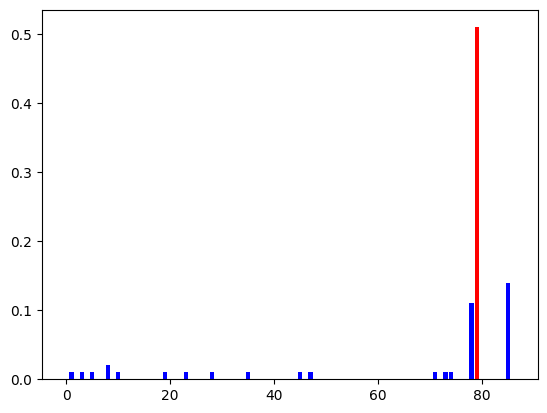

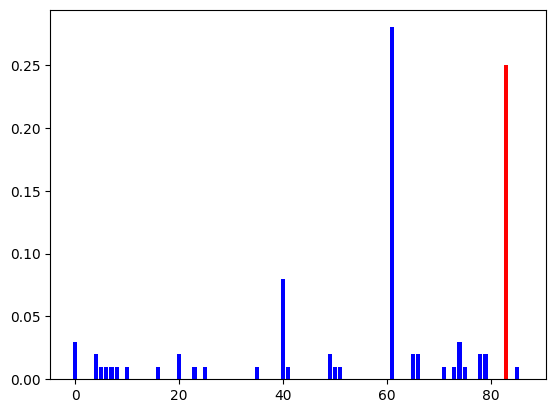

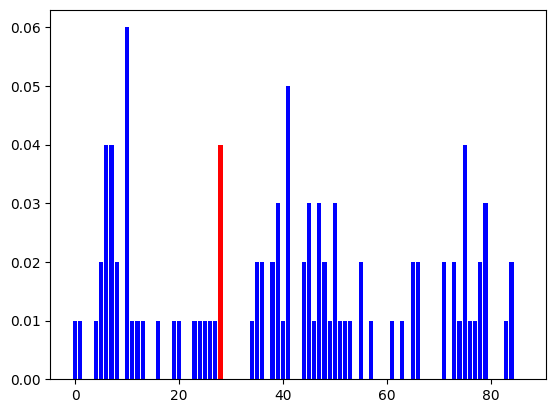

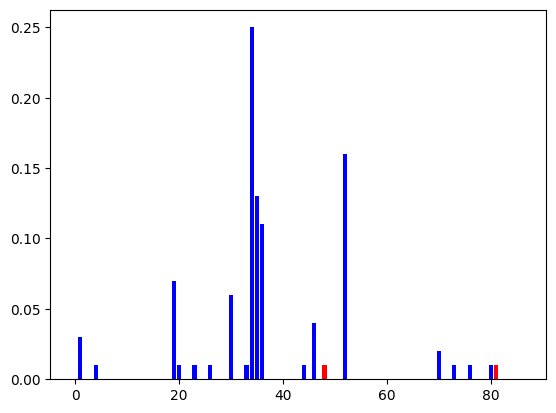

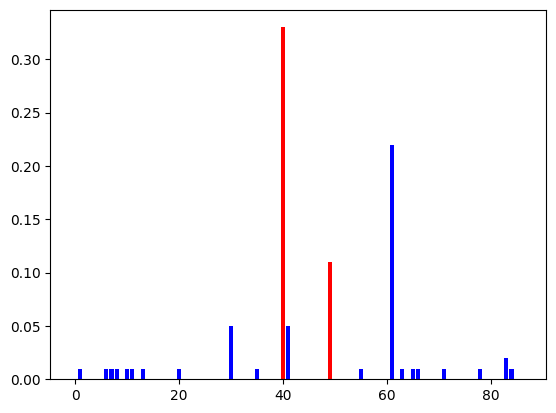

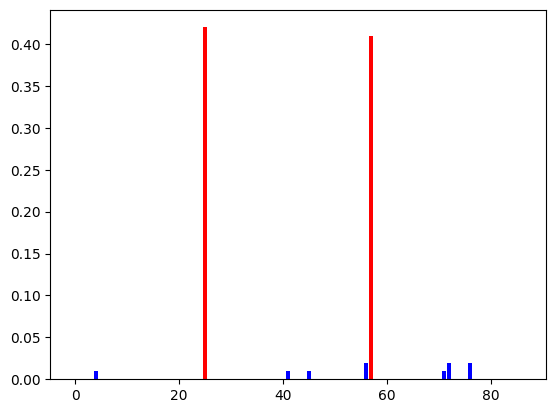

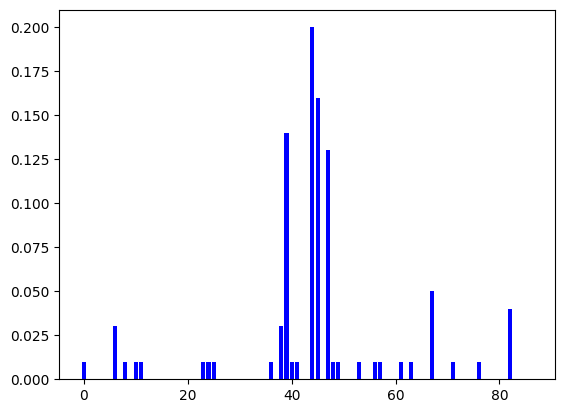

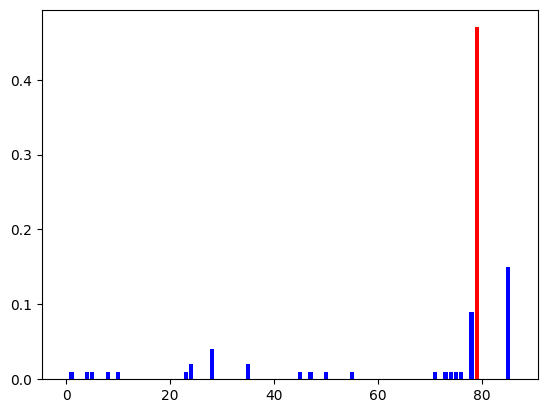

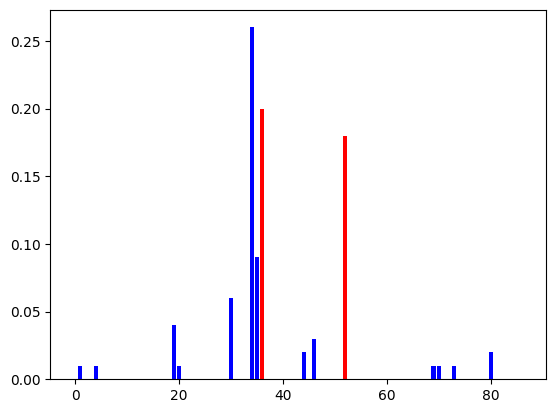

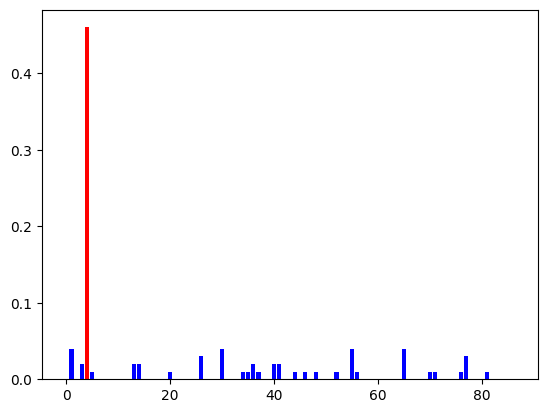

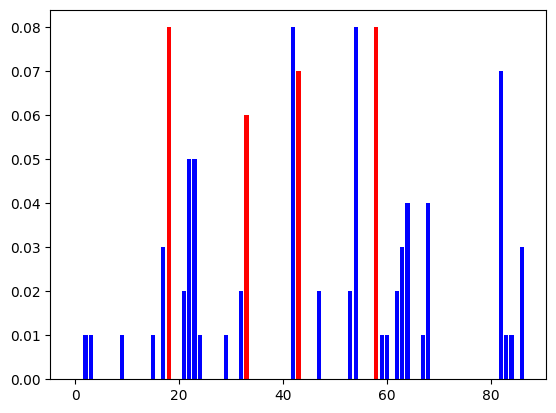

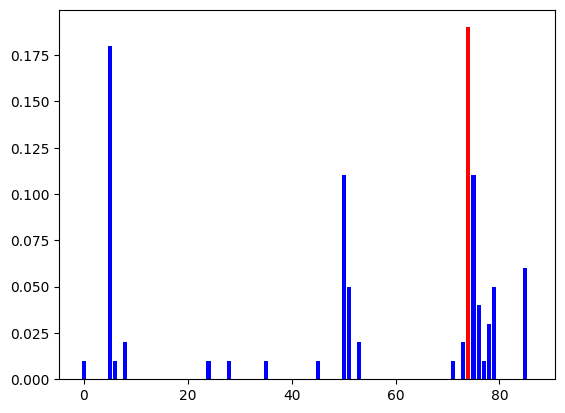

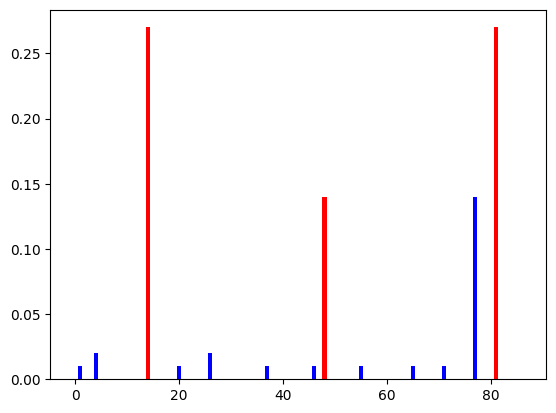

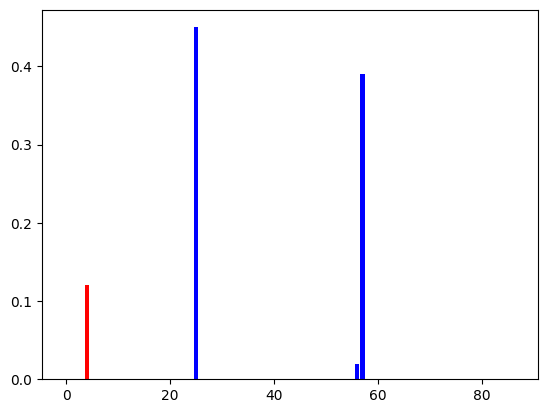

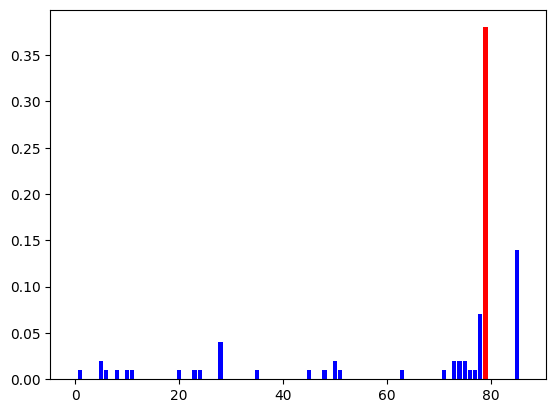

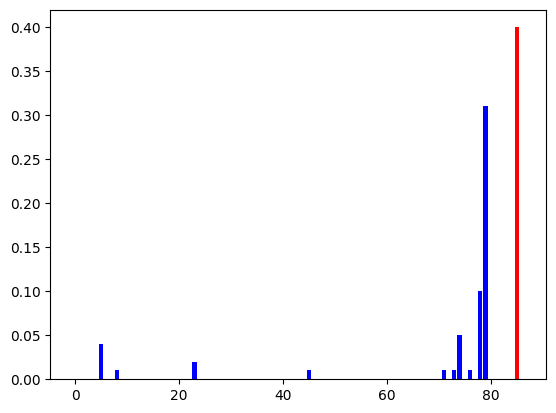

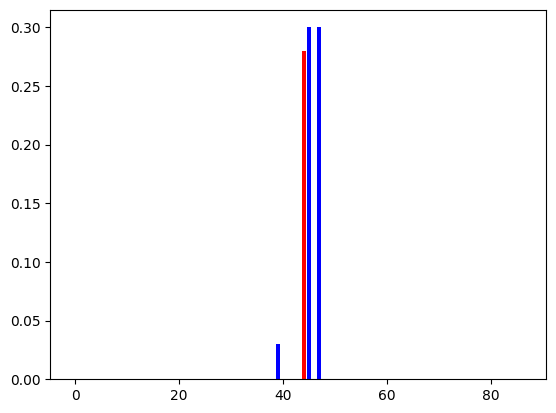

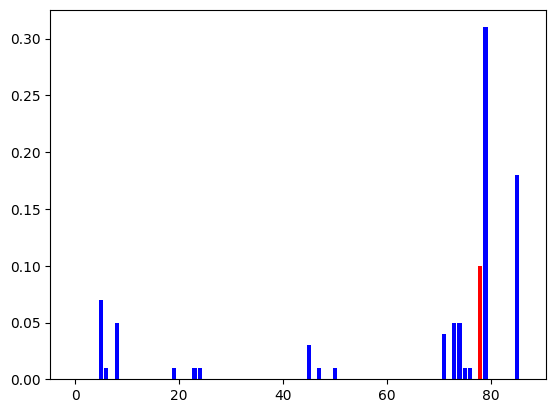

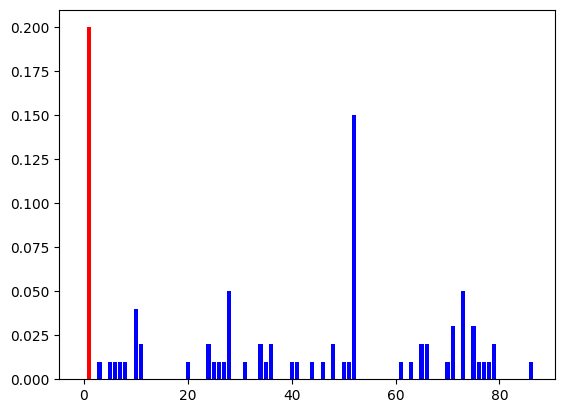

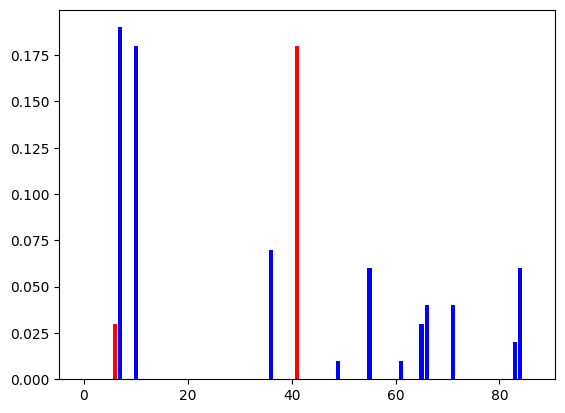

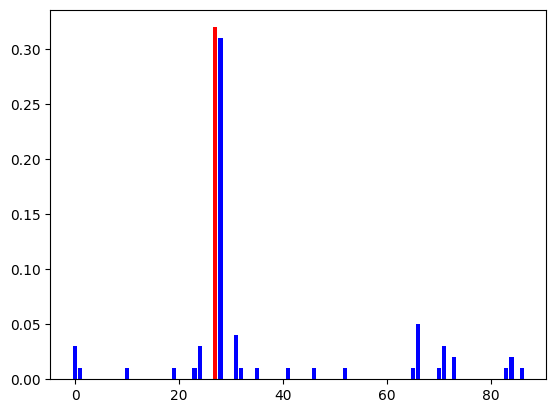

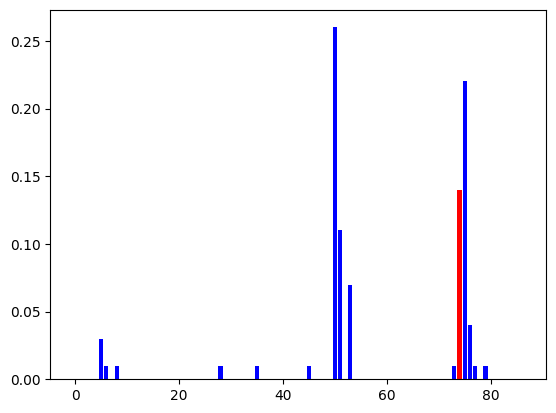

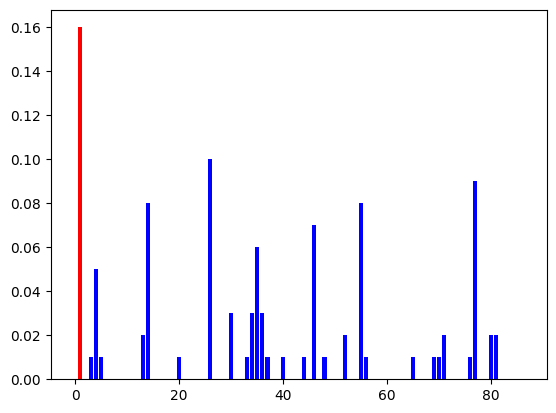

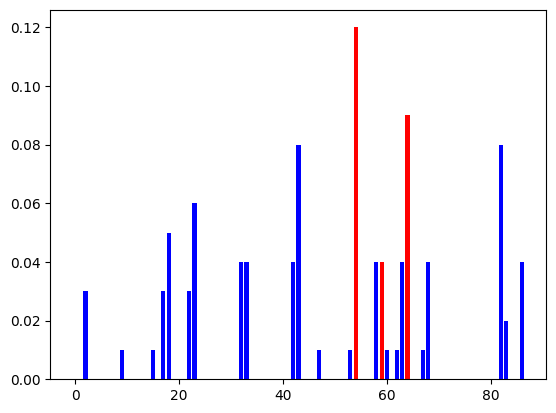

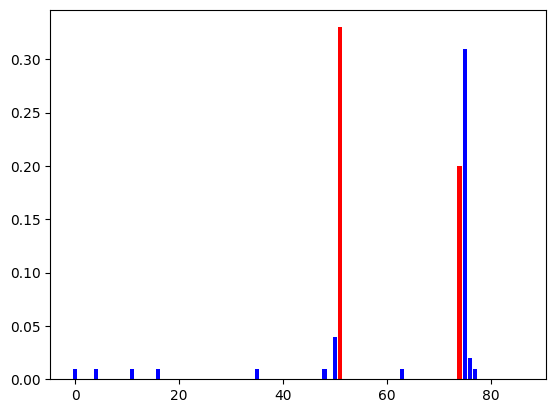

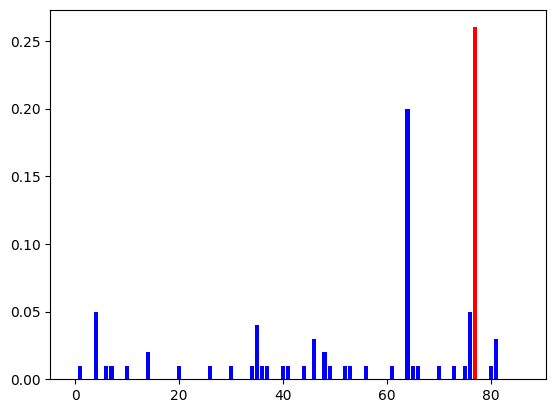

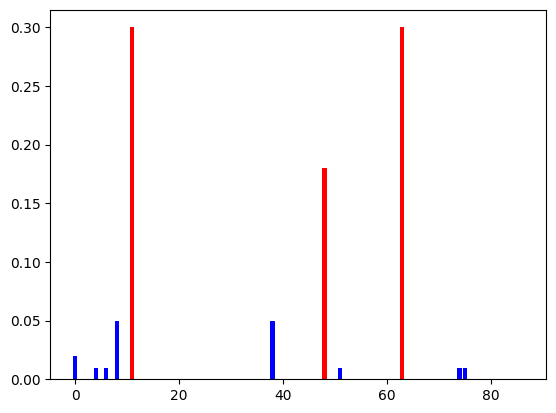

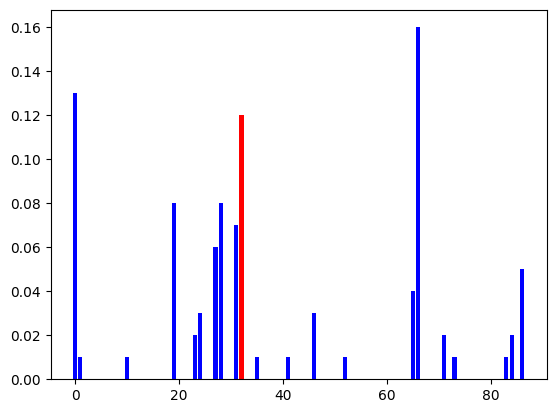

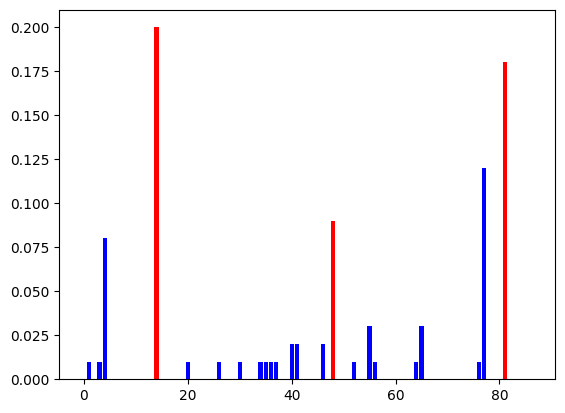

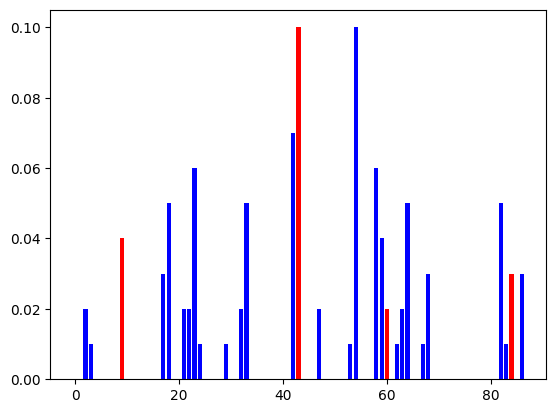

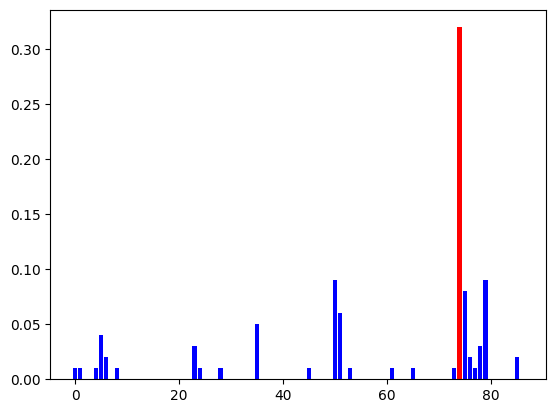

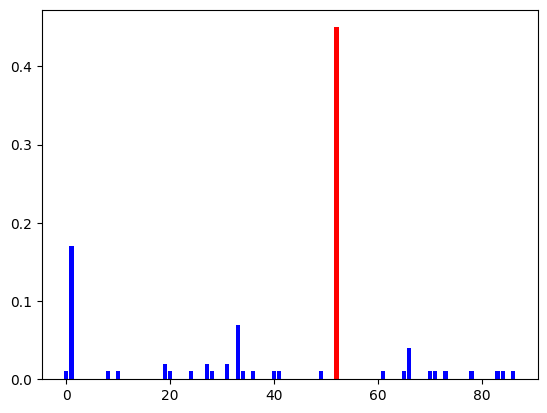

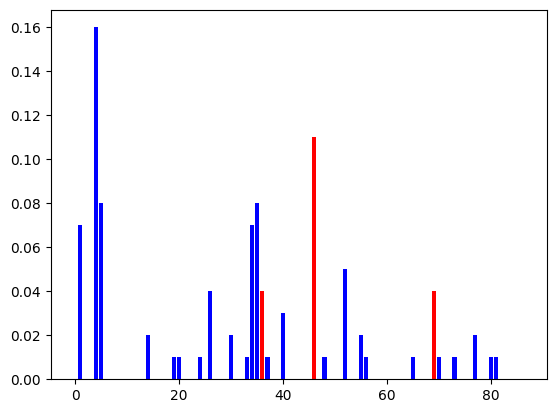

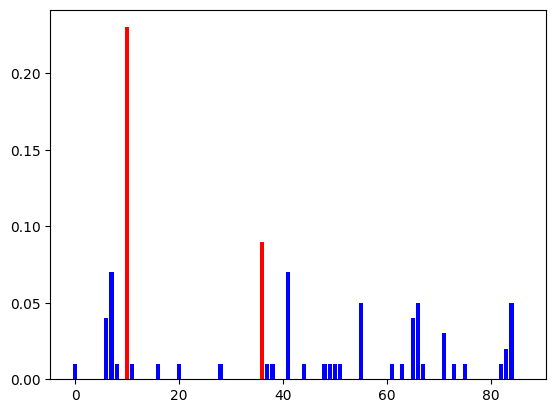

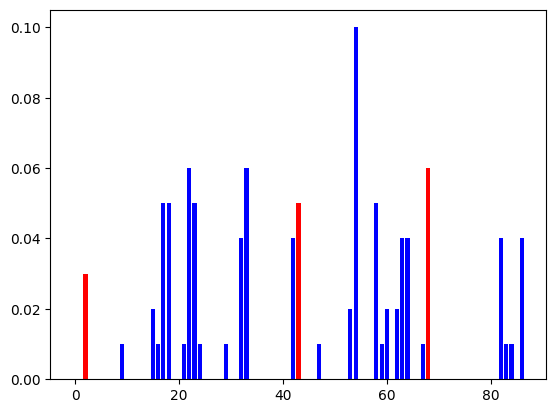

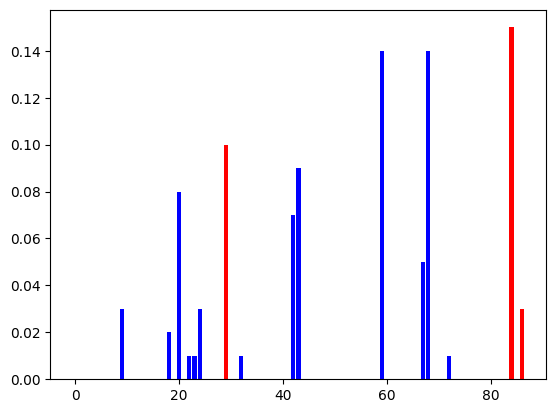

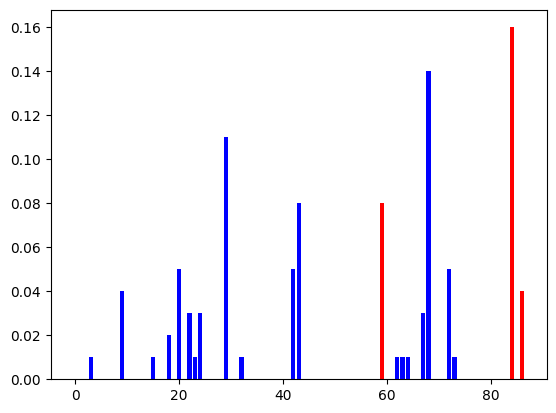

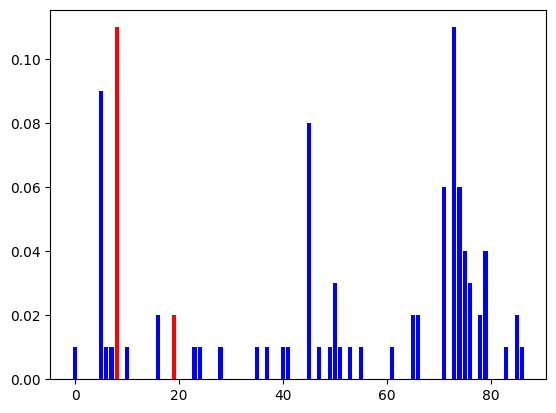

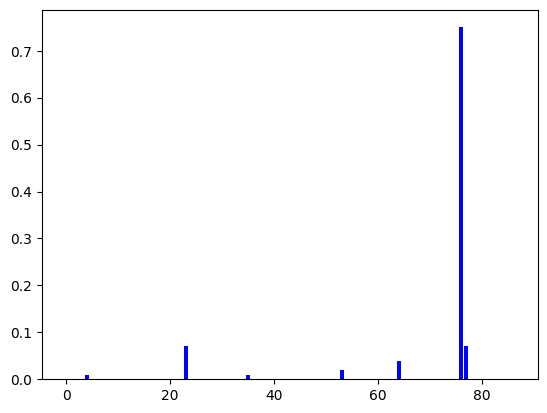

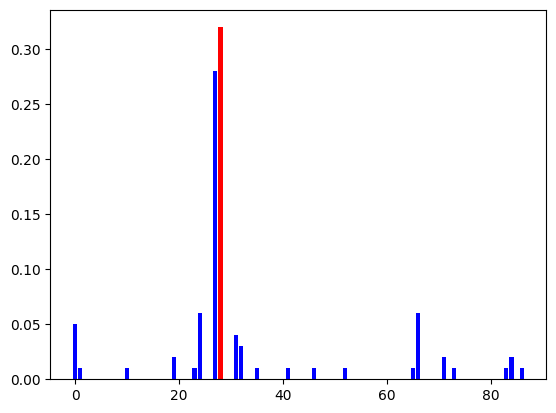

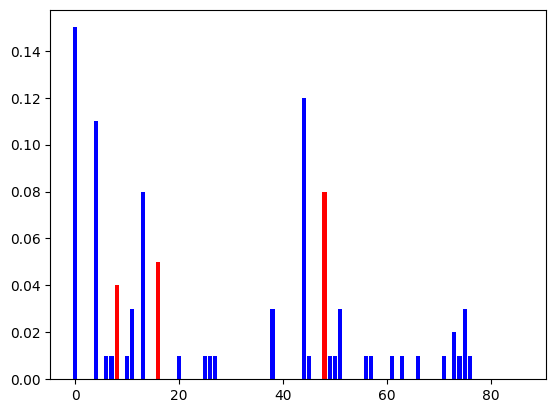

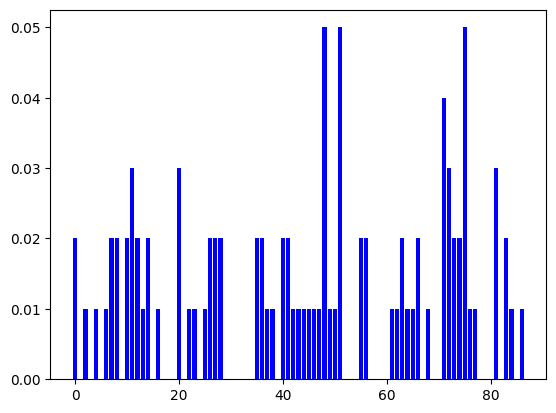

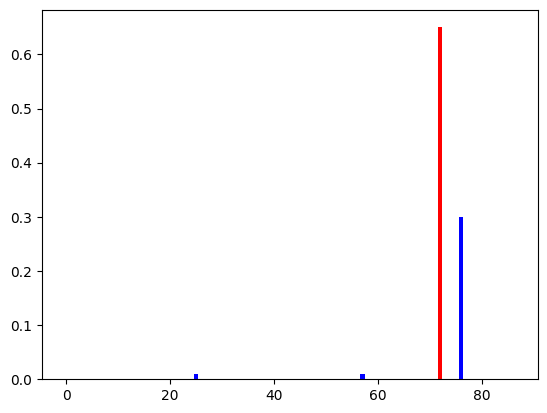

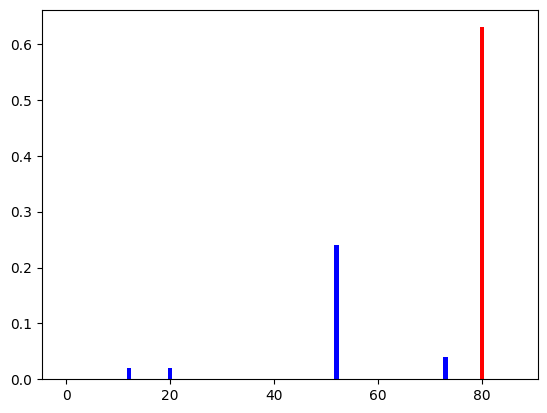

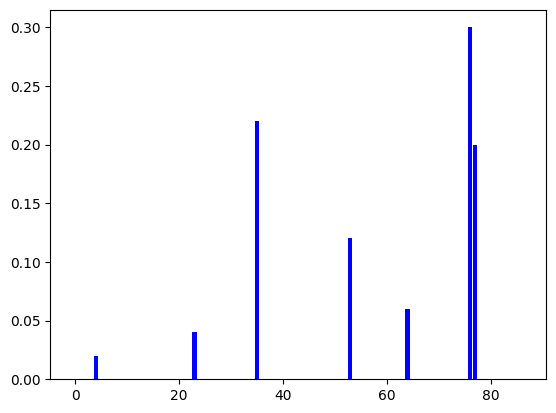

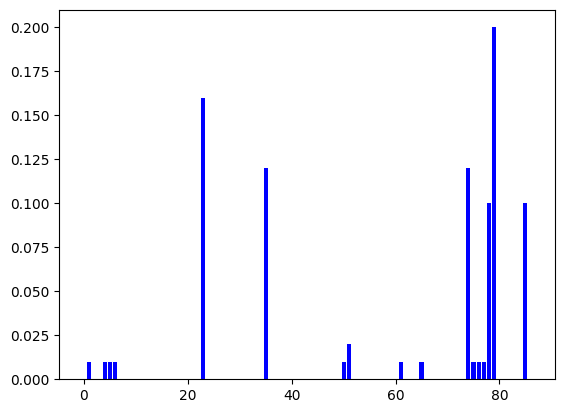

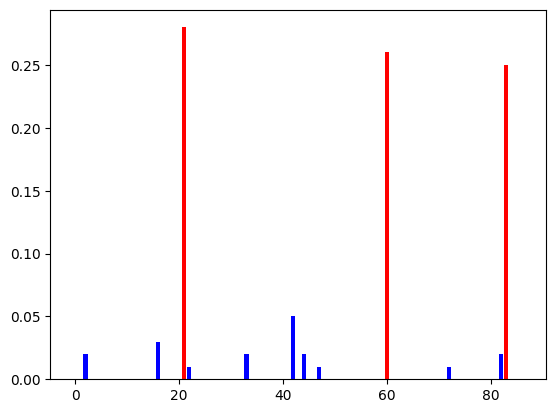

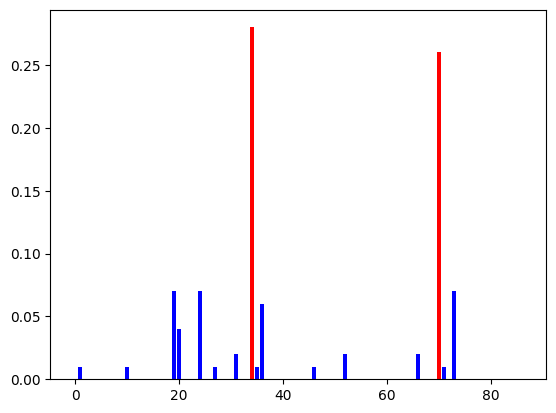

In [7]:
import matplotlib.pyplot as plt
print(pred_values.shape)
print(label_df.values.shape)

pred_values = pred_values[fold.testing_mask]
label_df = label_df[label_df.index.isin(test_set)]



for i in range(len(pred_values)):
    # print(np.round(pred_values[i],2))
    # print([label_df.values[i]>0])
    val = np.round(pred_values[i],2)
    positive = label_df.values[i]>0

    # color val by positive
    color = ['r' if positive[j] else 'b' for j in range(len(val))]
    plt.bar(np.arange(len(val)), val, color=color)
    plt.show()





In [ ]:
# line: file_name, score_of_label_0, score_of_label_1, ...


In [ ]:
# # plot roc curve
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(label_df.values.ravel(),pred_values.ravel())
# roc_auc = auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#             lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='random')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (FPR)')
# plt.ylabel('True Positive Rate (TPR)')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()